<a href="https://colab.research.google.com/github/mc-meicheng/mc-meicheng/blob/main/modules/03-integrating-ai/index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🤖 3 - Integrating artificial intelligence with geospatial data analysis and visualization

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/geojupyter/workshop-open-source-geospatial/blob/main/modules/03-integrating-ai/index.ipynb)

## Introduction

This notebook is for the workshop ([Open Source Geospatial Workflows in the Cloud](https://agu2025.workshops.geojupyter.org/)) presented at the [AGU Fall Meeting 2025](https://agu.confex.com/agu/agu25/meetingapp.cgi/Session/252640).

**GeoAI** represents the intersection of geospatial science and artificial intelligence, combining the power of machine learning with geographic information systems (GIS) to analyze, understand, and predict spatial patterns. This rapidly growing field enables us to extract meaningful insights from satellite imagery, aerial photos, and other geospatial datasets at unprecedented scales and accuracy levels.

The **GeoAI Python package** (https://opengeoai.org) simplifies the application of deep learning models to geospatial data, making advanced AI techniques accessible to researchers, analysts, and practitioners in environmental science, urban planning, agriculture, and disaster management. The package provides a unified interface for:

- **Data Preprocessing**: Automated handling of various geospatial data formats, coordinate systems, and multi-spectral imagery
- **Model Training**: Pre-configured deep learning architectures optimized for geospatial tasks like semantic segmentation and object detection
- **Feature Extraction**: Automated extraction of geographic features from satellite and aerial imagery
- **Visualization**: Interactive mapping and analysis tools for exploring results

In this workshop, you will:

- Discover the core capabilities of the GeoAI package, including data preprocessing, feature extraction, and geospatial deep learning workflows
- See live demonstrations on applying state-of-the-art AI models to satellite and aerial imagery
- Learn how to train custom segmentation models for surface water mapping using different data sources
- Explore real-world use cases in building footprint extraction and surface water mapping

Additional Resources

- GitHub: [GeoAI](https://github.com/opengeos/geoai)
- Book: [Introduction to GIS Programming: A Practical Python Guide to Open Source Geospatial Tools](https://gispro.gishub.org)
- YouTube: [Open Geospatial Solution](https://youtube.com/@giswqs)

## Deep Learning Architectures and Encoders

Before moving into the hands-on work, it’s important to first understand the key ideas behind **deep learning architectures** and **encoders**.

A **deep learning architecture** is like the **blueprint of a factory**. It defines how the network is organized, how data flows through different components, and how raw inputs are transformed into meaningful outputs. Just as a factory blueprint specifies where materials enter, how they are processed, and where finished products come out, a neural network architecture lays out the arrangement of layers (neurons) that progressively extract and refine patterns from data—for example, detecting cats in images or translating between languages.

Within this blueprint, an **encoder** functions as a **specialized assembly line**. Its role is to take messy raw materials (input data) and refine them into a compact, standardized representation that is easier for the rest of the system to work with. Some architectures also include a **decoder** assembly line, which reconstructs or generates the final output from the encoder’s compressed representation—for example, assembling a finished car from engine parts and panels.

In short:

- **Model architecture = the factory blueprint (overall design and flow)**
- **Encoder = the preprocessing line (condenses raw inputs into useful parts)**
- **Decoder = the finishing line (turns encoded parts into a final product)**

### Types of Architectures

Different blueprints are suited for different tasks:

- **Feedforward Neural Networks**: simple, one-directional flow of data.
- **Convolutional Neural Networks (CNNs)**: specialized for images, capturing spatial patterns like edges and textures.
- **Recurrent Neural Networks (RNNs)**: designed for sequences, such as speech or time series.
- **Transformers**: powerful models for language and beyond, using attention mechanisms (e.g., ChatGPT).

### What Does an Encoder Do?

An **encoder** is the part of a neural network that takes an input (like an image or a sentence) and compresses it into a smaller, meaningful form called a **feature representation** or **embedding**. This process keeps the essential information while filtering out noise.

For example, the sentence _“I love pizza”_ might be converted by an encoder into a vector of numbers that still reflects its meaning, but in a way that is easier for a computer to analyze and use.

Encoders appear in many contexts:

- **Autoencoders**: learn to compress and reconstruct data.
- **Transformer Encoders**: such as BERT, used for language understanding.
- **Encoder–Decoder Models**: such as translation systems, where the encoder reads one language and the decoder generates another.

### Encoders and Architectures in Practice

The [pytorch segmentation models library](https://github.com/qubvel-org/segmentation_models.pytorch) provides a wide range of pre-trained models for semantic segmentation. It separates **architectures** (the blueprint) from **encoders** (the feature extractors):

- **Architectures**: `unet`, `unetplusplus`, `deeplabv3`, `deeplabv3plus`, `fpn`, `pspnet`, `linknet`, `manet`.
- **Encoders**: `resnet34`, `resnet50`, `efficientnet-b0`, `mobilenet_v2`, and many more.

The **GeoAI** package builds on this library, offering a convenient wrapper so you can easily train your own segmentation models with a variety of architectures and encoders.

## Environment Setup

You can run this notebook locally or in Google Colab. You will need a GPU for training deep learning models. If you don't have a GPU, you can use the free GPU in Google Colab.

To install the GeoAI package, it is recommended to use a virtual environment. Please refer to the [GeoAI installation guide](https://opengeoai.org/installation/) for more details.

Here is a quick start guide to install the GeoAI package:

```bash
conda create -n geo -c conda-forge mamba
conda activate geo
mamba install -c conda-forge python=3.12 geoai
```

If you have a GPU, you can install the package with GPU support:

```bash
mamba install -c conda-forge geoai "pytorch=*=cuda*"
```

You can install the package using pip:

```bash
pip install geoai-py
```

## Use Colab GPU

To use GPU, please click the "Runtime" menu and select "Change runtime type". Then select "T4 GPU" from the dropdown menu. GPU acceleration is highly recommended for training deep learning models, as it can reduce training time from hours to minutes.

## Install packages

Uncomment the following cell to install the package. It may take a few minutes to install the package and its dependencies. Please be patient.

In [1]:
%pip install geoai-py

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.9/44.9 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 306.0/306.0 kB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 632.9/632.9 kB 39.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.5/122.5 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 41.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 67.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 650.7/650.7 kB 50.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.5/20.5 MB 87.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 94.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.8/241.8 kB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1

## Import libraries

Let's import the GeoAI package.

In [2]:
import geoai

## Surface water mapping with non-georeferenced satellite imagery

**Surface water mapping** is one of the most important applications of GeoAI, as water resources are critical for ecosystem health, agriculture, urban planning, and climate monitoring. In this first demonstration, we'll work with **non-georeferenced satellite imagery** in standard image formats (JPG/PNG), which is often how satellite imagery is initially distributed or stored.

**Why start with non-georeferenced imagery?**

- Many datasets and online sources provide satellite imagery without embedded geographic coordinates
- It demonstrates the core computer vision aspects of GeoAI before adding geospatial complexity
- The techniques learned here can be applied to any imagery, regardless of coordinate system
- It's often faster to iterate and experiment with standard image formats

We'll use **semantic segmentation**, a deep learning technique that classifies every pixel in an image. Unlike object detection (which draws bounding boxes), semantic segmentation provides precise pixel-level predictions, making it ideal for mapping natural features like water bodies that have irregular shapes.

### Download sample data

We'll use the [waterbody dataset](https://www.kaggle.com/datasets/franciscoescobar/satellite-images-of-water-bodies) from Kaggle, which contains 2,841 satellite image pairs with corresponding water masks. This dataset is particularly valuable because:

- **Diverse geographic coverage**: Images from different continents and climate zones
- **Varied water body types**: Lakes, rivers, ponds, and coastal areas
- **Multiple seasons and conditions**: Different lighting conditions and seasonal variations
- **High-quality annotations**: Manually verified water body masks for training

Credits to the author Francisco Escobar for providing this dataset.

I downloaded the dataset from Kaggle and uploaded it to Hugging Face for easy access:

In [3]:
url = "https://huggingface.co/datasets/giswqs/geospatial/resolve/main/waterbody-dataset.zip"

In [4]:
out_folder = geoai.download_file(url)
print(f"Downloaded dataset to {out_folder}")

Extracted to: waterbody-dataset
Downloaded dataset to waterbody-dataset


The unzipped dataset contains two folders: `images` and `masks`. Each folder contains 2,841 images in JPG format. The `images` folder contains the original satellite imagery, and the `masks` folder contains the corresponding surface water masks in binary format (white pixels = water, black pixels = background).

**Dataset characteristics:**

- **Total image pairs**: 2,841 training examples
- **Image format**: RGB satellite imagery (3 channels)
- **Mask format**: Binary masks where 255 = water, 0 = background
- **Variable image sizes**: Ranging from small 256x256 patches to larger 1024x1024+ images
- **Global coverage**: Samples from diverse geographic regions and water body types

### Train semantic segmentation model

Now we'll train a semantic segmentation model using **U-Net** architecture with a **ResNet34** encoder and **ImageNet** pre-trained weights. Let's break down these important choices:

**Architecture: U-Net**

- **U-Net** is a convolutional neural network architecture specifically designed for semantic segmentation
- It has a "U" shape with an encoder (downsampling) path and a decoder (upsampling) path
- **Skip connections** between encoder and decoder preserve fine-grained spatial details
- Originally designed for medical image segmentation, it works exceptionally well for geospatial applications

**Encoder: ResNet34**

- **ResNet34** is a 34-layer Residual Network that serves as the feature extraction backbone
- **Residual connections** allow training of very deep networks without vanishing gradient problems
- Balances model complexity with computational efficiency (deeper than ResNet18, more efficient than ResNet50)
- Well-suited for satellite imagery feature extraction

**Pre-trained weights: ImageNet**

- **Transfer learning** from ImageNet provides a strong starting point for feature extraction
- ImageNet-trained models have learned to recognize edges, textures, and patterns relevant to natural imagery
- Significantly reduces training time and improves performance, especially with limited training data
- The encoder starts with knowledge of general image features, then specializes for water detection

**Key training parameters:**

- `num_channels=3`: RGB satellite imagery (red, green, blue bands)
- `num_classes=2`: Binary classification (background vs. water)
- `batch_size=32`: Process 32 images simultaneously for efficient GPU utilization
- `num_epochs=3`: Training iterations (limited for demo; real-world would use 20-50+ epochs)
- `learning_rate=0.001`: Controls optimization step size
- `val_split=0.2`: Reserve 20% of data for validation to monitor overfitting
- `target_size=(512, 512)`: Standardize all images to 512x512 pixels for consistent processing

For more details on available architectures and encoders, please refer to https://smp.readthedocs.io/en/latest/encoders.html.

In [5]:
# Test train_segmentation_model with automatic size detection
geoai.train_segmentation_model(
    images_dir=f"{out_folder}/images",
    labels_dir=f"{out_folder}/masks",
    output_dir=f"{out_folder}/unet_models",
    architecture="unet",  # The architecture to use for the model
    encoder_name="resnet34",  # The encoder to use for the model
    encoder_weights="imagenet",  # The weights to use for the encoder
    num_channels=3,  # number of channels in the input image
    num_classes=2,  # background and water
    batch_size=16,  # The number of images to process in each batch
    num_epochs=3,  # training for 3 epochs to save time, in practice you should train for more epochs (20+)
    learning_rate=0.001,  # learning rate for the optimizer
    val_split=0.2,  # 20% of the data for validation
    target_size=(512, 512),  # target size of the input image
    verbose=True,  # print progress
)

Using device: cuda
Found 2841 image files and 2841 label files
Training on 2272 images, validating on 569 images
Testing data loader...
Data loader test passed.


config.json:   0%|          | 0.00/156 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/87.3M [00:00<?, ?B/s]

Starting training with unet + resnet34
Model parameters: 24,436,514
Epoch: 1, Batch: 1/142, Loss: 0.7388, Time: 10.94s
Epoch: 1, Batch: 11/142, Loss: 0.4492, Time: 8.99s
Epoch: 1, Batch: 21/142, Loss: 0.5418, Time: 9.02s
Epoch: 1, Batch: 31/142, Loss: 0.4976, Time: 9.10s
Epoch: 1, Batch: 41/142, Loss: 0.4732, Time: 9.13s
Epoch: 1, Batch: 51/142, Loss: 0.5692, Time: 9.12s
Epoch: 1, Batch: 61/142, Loss: 0.5192, Time: 9.13s
Epoch: 1, Batch: 71/142, Loss: 0.3717, Time: 9.17s
Epoch: 1, Batch: 81/142, Loss: 0.4880, Time: 9.21s
Epoch: 1, Batch: 91/142, Loss: 0.5487, Time: 9.24s
Epoch: 1, Batch: 101/142, Loss: 0.5334, Time: 9.30s
Epoch: 1, Batch: 111/142, Loss: 0.4020, Time: 9.37s
Epoch: 1, Batch: 121/142, Loss: 0.4308, Time: 9.39s
Epoch: 1, Batch: 131/142, Loss: 0.4546, Time: 9.40s
Epoch: 1, Batch: 141/142, Loss: 0.3566, Time: 9.42s
Epoch 1/3: Train Loss: 0.4855, Val Loss: 0.4713, Val IoU: 0.5926, Val F1: 0.6975, Val Precision: 0.7939, Val Recall: 0.7201
Saving best model with IoU: 0.5926
Epo

NameError: name 'unet_models' is not defined

In the model output folder `unet_models`, you will find the following files:

- `best_model.pth`: The best model checkpoint (highest validation IoU)
- `final_model.pth`: The last model checkpoint from the final epoch
- `training_history.pth`: Complete training metrics for analysis and plotting
- `training_summary.txt`: Human-readable summary of training configuration and results

### Evaluate the model

Model evaluation is crucial for understanding how well our trained model performs. We'll examine both the **training curves** and **quantitative metrics** to assess model quality and identify potential issues like overfitting or underfitting.

**Key evaluation metrics for semantic segmentation:**

1. **Loss**: Measures how far the model's predictions are from the ground truth

   - **Training loss**: How well the model fits the training data
   - **Validation loss**: How well the model generalizes to unseen data
   - **Ideal pattern**: Both should decrease, with validation loss closely following training loss

2. **IoU (Intersection over Union)**: The most important metric for segmentation tasks

   - **Definition**: Area of overlap / Area of union between prediction and ground truth
   - **Range**: 0.0 (no overlap) to 1.0 (perfect overlap)
   - **Interpretation**: 0.69 IoU means ~69% accurate pixel-level water detection
   - **Industry standard**: IoU > 0.7 is generally considered good performance

3. **Dice (F-1) Score**: Alternative segmentation metric, closely related to IoU
   - **Definition**: 2 × (Area of overlap) / (Total pixels in both prediction and ground truth)
   - **Range**: 0.0 to 1.0, similar to IoU but slightly more lenient
   - **Relationship**: Dice = 2×IoU / (1+IoU)

IoU and Dice are monotonically related—optimizing one generally optimizes the other. However, Dice tends to give slightly higher values than IoU for the same segmentation.

- **IoU** is stricter: it penalizes false positives and false negatives more heavily, making it less forgiving of small mismatches.

- **Dice** is more sensitive to overlap and is often preferred in **medical image segmentation**, where the overlap between predicted and actual regions is more important than absolute boundaries.

- **IoU** is often used in **object detection and computer vision challenges** (e.g., COCO benchmark), because it aligns with bounding box overlap evaluation.

Let's examine the training curves and model performance:

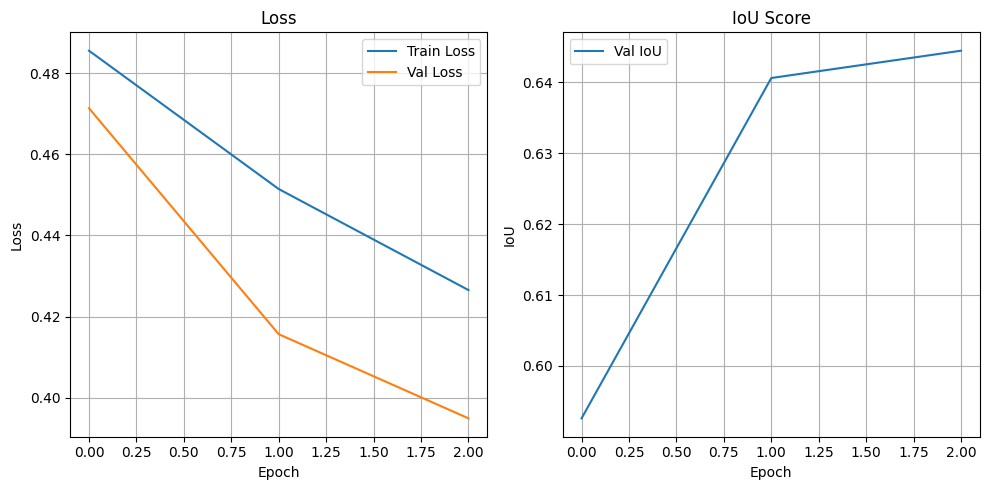

Best IoU: 0.6445
Final IoU: 0.6445


In [7]:
geoai.plot_performance_metrics(
    history_path=f"{out_folder}/unet_models/training_history.pth",
    figsize=(15, 5),
    verbose=True,
)

![image](https://github.com/user-attachments/assets/381ce436-3520-4706-9def-b0a7ae8244ac)

### Run inference on a single image

**Inference** is the process of using our trained model to make predictions on new, unseen images. This is where we see the practical application of our trained model.

**Note on testing approach:**
In this demo, we're using one of the training images for inference to demonstrate the workflow. In a real-world scenario, you should always test on completely independent images that were never seen during training to get an accurate assessment of model performance.

You can run inference on a new image using the `semantic_segmentation` function:

In [8]:
index = 3  # change it to other image index, e.g., 100
test_image_path = f"{out_folder}/images/water_body_{index}.jpg"
ground_truth_path = f"{out_folder}/masks/water_body_{index}.jpg"
prediction_path = f"{out_folder}/prediction/water_body_{index}.png"  # save as png to preserve exact values and avoid compression artifacts
model_path = f"{out_folder}/unet_models/best_model.pth"

In [9]:
geoai.semantic_segmentation(
    input_path=test_image_path,
    output_path=prediction_path,
    model_path=model_path,
    architecture="unet",
    encoder_name="resnet34",
    num_channels=3,
    num_classes=2,
    window_size=512,
    overlap=256,
    batch_size=32,
)

Input file format: Regular image (.jpg)
Processing image: 658x659
Processing 4 windows...


9it [00:00, 32.29it/s]

Raw predicted classes and counts: {0: 355836, 1: 77786}
Binary predicted classes and counts: {0: 355836, 255: 77786}
Inference completed in 0.34 seconds
Saved binary prediction to waterbody-dataset/prediction/water_body_3.png (PNG format to preserve exact values)


Plot saved to: waterbody-dataset/prediction/water_body_3_comparison.png


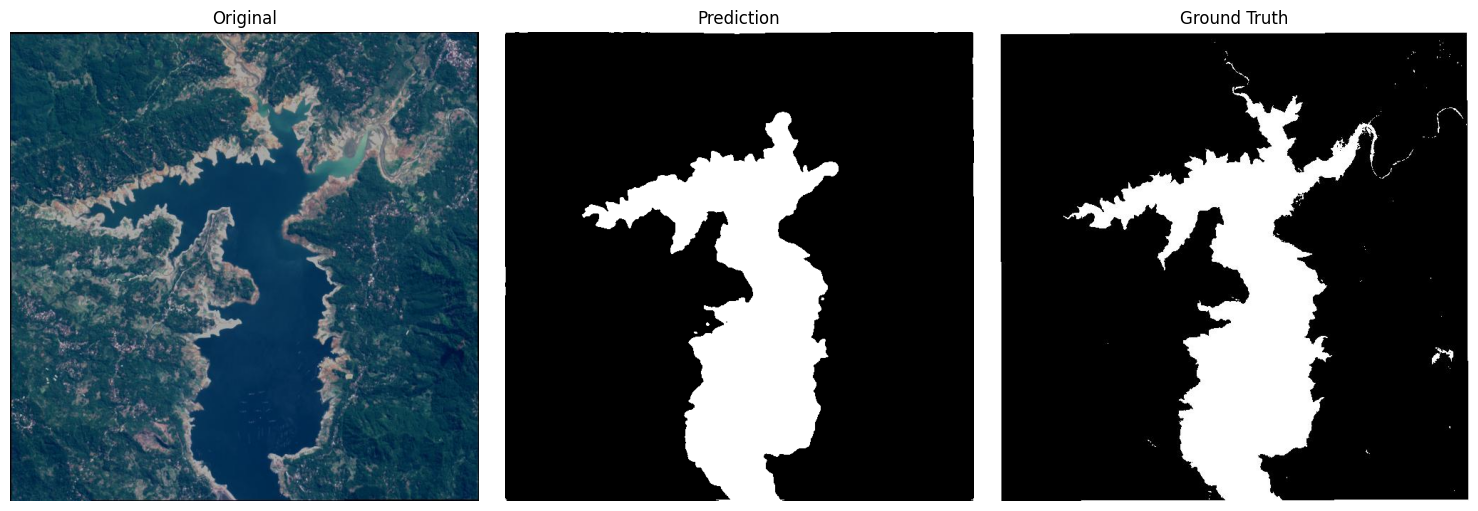

In [10]:
fig = geoai.plot_prediction_comparison(
    original_image=test_image_path,
    prediction_image=prediction_path,
    ground_truth_image=ground_truth_path,
    titles=["Original", "Prediction", "Ground Truth"],
    figsize=(15, 5),
    save_path=f"{out_folder}/prediction/water_body_{index}_comparison.png",
    show_plot=True,
)

![image](https://github.com/user-attachments/assets/00308228-0819-4161-9a35-6a98f4cefa93)

### Run inference on multiple images

**Batch processing** is essential for operational applications where you need to process many images efficiently. The GeoAI package provides `semantic_segmentation_batch` for processing entire directories of images with consistent parameters.

First, let's download a sample set of test images that the model has never seen:

In [ ]:
url = "https://huggingface.co/datasets/giswqs/geospatial/resolve/main/waterbody-dataset-sample.zip"

In [ ]:
data_dir = geoai.download_file(url)
print(f"Downloaded dataset to {data_dir}")

In [ ]:
images_dir = f"{data_dir}/images"
masks_dir = f"{data_dir}/masks"
predictions_dir = f"{data_dir}/predictions"

In [ ]:
geoai.semantic_segmentation_batch(
    input_dir=images_dir,
    output_dir=predictions_dir,
    model_path=model_path,
    architecture="unet",
    encoder_name="resnet34",
    num_channels=3,
    num_classes=2,
    window_size=512,
    overlap=256,
    batch_size=4,
    quiet=True,
)

In [ ]:
geoai.empty_cache()

## Surface water mapping with Sentinel-2 imagery

In the second part of this notebook, we'll demonstrate surface water mapping using **Sentinel-2 satellite imagery**, which provides **multispectral data** with much richer information than standard RGB imagery.

**Why Sentinel-2 is ideal for water mapping:**

**Sentinel-2** is a European Space Agency (ESA) satellite mission providing high-resolution optical imagery for land monitoring. Key advantages for water detection include:

- **Multispectral capabilities**: 13 spectral bands covering visible, near-infrared, and short-wave infrared
- **High spatial resolution**: 10-20m pixels for detailed water body mapping
- **Frequent revisit time**: 5-day global coverage for monitoring temporal changes
- **Free and open access**: Available through Copernicus Open Access Hub and other platforms
- **Consistent quality**: Calibrated, atmospherically corrected imagery (Level 2A)

**Spectral bands used in this analysis:**

1. **Blue (490nm)**: Water absorption, atmospheric correction
2. **Green (560nm)**: Vegetation health, water clarity
3. **Red (665nm)**: Vegetation chlorophyll, land-water contrast
4. **Near-Infrared (842nm)**: **Critical for water detection** - water strongly absorbs NIR
5. **SWIR1 (1610nm)**: **Excellent water discriminator** - water has very low reflectance
6. **SWIR2 (2190nm)**: **Additional water detection** - separates water from wet soil/vegetation

### Download sample data

We'll use the [Earth Surface Water Dataset](https://zenodo.org/records/5205674#.Y4iEFezP1hE) from Zenodo, which contains Sentinel-2 imagery with 6 spectral bands and corresponding water masks. Credits to Xin Luo for creating this high-quality dataset.

**Dataset characteristics:**

- **Sensor**: Sentinel-2 Level 2A (atmospherically corrected)
- **Bands**: Blue, Green, Red, NIR, SWIR1, SWIR2 (6 channels total)
- **Spatial resolution**: 10-20 meters per pixel
- **Geographic coverage**: Multiple global locations with diverse water body types
- **Ground truth**: Expert-annotated water masks for training and validation

In [11]:
url = "https://huggingface.co/datasets/giswqs/geospatial/resolve/main/dset-s2.zip"
data_dir = geoai.download_file(url, output_path="dset-s2.zip")

Extracted to: dset-s2


**Dataset structure:**

In the unzipped dataset, we have four folders:

- `dset-s2/tra_scene`: **Training images** - Sentinel-2 scenes for model training
- `dset-s2/tra_truth`: **Training masks** - Corresponding water truth masks
- `dset-s2/val_scene`: **Validation images** - Independent Sentinel-2 scenes for testing
- `dset-s2/val_truth`: **Validation masks** - Ground truth for performance evaluation

We will use the training images and masks to train our model, then evaluate performance on the completely independent validation set.

In [ ]:
images_dir = f"{data_dir}/dset-s2/tra_scene"
masks_dir = f"{data_dir}/dset-s2/tra_truth"
tiles_dir = f"{data_dir}/dset-s2/tiles"

### Create training data

We'll create smaller training tiles from the large GeoTIFF images. Note that we have multiple Sentinel-2 scenes in the training and validation sets, we will use the `export_geotiff_tiles_batch` function to export tiles from each scene.

In [ ]:
result = geoai.export_geotiff_tiles_batch(
    images_folder=images_dir,
    masks_folder=masks_dir,
    output_folder=tiles_dir,
    tile_size=512,
    stride=128,
    quiet=True,
)

### Train semantic segmentation model

Now we'll train a semantic segmentation model specifically for **6-channel Sentinel-2 imagery**. The key difference from our previous model is the input channel configuration.

**Important parameter changes:**

- `num_channels=6`: Accommodate the 6 Sentinel-2 spectral bands (Blue, Green, Red, NIR, SWIR1, SWIR2)
- `num_epochs=5`: Slightly more training epochs to learn complex spectral relationships
- **Architecture remains U-Net + ResNet34**: Proven effective for multispectral imagery

Let's train the model using the Sentinel-2 tiles:

In [ ]:
geoai.train_segmentation_model(
    images_dir=f"{tiles_dir}/images",
    labels_dir=f"{tiles_dir}/masks",
    output_dir=f"{tiles_dir}/unet_models",
    architecture="unet",
    encoder_name="resnet34",
    encoder_weights="imagenet",
    num_channels=6,
    num_classes=2,  # background and water
    batch_size=32,
    num_epochs=3,  # training for 3 epochs to save time, in practice you should train for more epochs
    learning_rate=0.001,
    val_split=0.2,
    verbose=True,
)

### Evaluate the model

Let's examine the training curves and model performance:

In [ ]:
geoai.plot_performance_metrics(
    history_path=f"{tiles_dir}/unet_models/training_history.pth",
    figsize=(15, 5),
    verbose=True,
)

![image](https://github.com/user-attachments/assets/61f675a7-ee67-4650-81c0-f754fe681f4d)

### Run inference

Now we'll run inference on the validation set to evaluate the model's performance. We will use the `semantic_segmentation_batch` function to process all the validation images at once.

In [ ]:
images_dir = f"{data_dir}/dset-s2/val_scene"
masks_dir = f"{data_dir}/dset-s2/val_truth"
predictions_dir = f"{data_dir}/dset-s2/predictions"
model_path = f"{tiles_dir}/unet_models/best_model.pth"

In [ ]:
geoai.semantic_segmentation_batch(
    input_dir=images_dir,
    output_dir=predictions_dir,
    model_path=model_path,
    architecture="unet",
    encoder_name="resnet34",
    num_channels=6,
    num_classes=2,
    window_size=512,
    overlap=256,
    batch_size=32,
    quiet=True,
)

### Visualize results

In [ ]:
image_id = "S2A_L2A_20190318_N0211_R061"  # Change to other image id, e.g., S2B_L2A_20190620_N0212_R047
test_image_path = f"{data_dir}/dset-s2/val_scene/{image_id}_6Bands_S2.tif"
ground_truth_path = f"{data_dir}/dset-s2/val_truth/{image_id}_S2_Truth.tif"
prediction_path = f"{data_dir}/dset-s2/predictions/{image_id}_6Bands_S2_mask.tif"
save_path = f"{data_dir}/dset-s2/{image_id}_6Bands_S2_comparison.png"

fig = geoai.plot_prediction_comparison(
    original_image=test_image_path,
    prediction_image=prediction_path,
    ground_truth_image=ground_truth_path,
    titles=["Original", "Prediction", "Ground Truth"],
    figsize=(15, 5),
    save_path=save_path,
    show_plot=True,
    indexes=[5, 4, 3],
    divider=5000,
)

![image](https://github.com/user-attachments/assets/53601ed7-2bd6-4e7e-b369-4d7bfc2ce120)

### Download Sentinel-2 imagery

**Real-world data acquisition** is a crucial skill for operational GeoAI applications. Here we'll demonstrate how to:

1. **Search for Sentinel-2 data** using STAC (SpatioTemporal Asset Catalog) APIs
2. **Apply quality filters** (cloud cover, date range, geographic bounds)
3. **Download specific spectral bands** needed for our analysis
4. **Prepare data** for inference with our trained model

**STAC catalogs** provide a standardized way to search and access satellite imagery across different providers. The Earth Search STAC API aggregates Sentinel-2 data from AWS Open Data, making it easily accessible for analysis.

**Search parameters:**

- **Geographic bounds**: Define area of interest (bbox)
- **Temporal range**: Specify date range for imagery
- **Cloud cover filter**: Limit to images with <10% cloud cover
- **Collection**: Focus on Sentinel-2 Level 2A (atmospherically corrected)
- **Sorting**: Order by cloud cover (ascending) to get clearest images first

Let's set up an interactive map to explore available Sentinel-2 data:

In [ ]:
import os
import leafmap

Set up the [TiTiler](https://developmentseed.org/titiler/) endpoint for visualizing raster data.

In [ ]:
os.environ["TITILER_ENDPOINT"] = "https://giswqs-titiler-endpoint.hf.space"

Create an interactive map to explore available Sentinel-2 data.

In [ ]:
m = leafmap.Map(center=[46.693725, -95.925399], zoom=12)
m.add_basemap("Esri.WorldImagery")
m.add_stac_gui()
m

In [ ]:
try:
    print(m.user_roi_bounds())
except:
    print("Please draw a rectangle on the map before running this cell")

Use the drawing tool to draw a rectangle on the map. Click on the **Search** button to search Sentinel-2 imagery intersecting the rectangle.

In [ ]:
try:
    display(m.stac_gdf)
except:
    print("Click on the Search button before running this cell")

In [ ]:
try:
    display(m.stac_item)
except:
    print("click on the Display button before running this cell")

Search for Sentinel-2 data programmatically.

In [ ]:
url = "https://earth-search.aws.element84.com/v1/"
collection = "sentinel-2-l2a"
time_range = "2025-08-15/2025-08-31"
bbox = [-95.9912, 46.6704, -95.834, 46.7469]

In [ ]:
search = leafmap.stac_search(
    url=url,
    max_items=10,
    collections=[collection],
    bbox=bbox,
    datetime=time_range,
    query={"eo:cloud_cover": {"lt": 10}},
    sortby=[{"field": "properties.eo:cloud_cover", "direction": "asc"}],
    get_collection=True,
)
search

In [ ]:
search = leafmap.stac_search(
    url=url,
    max_items=10,
    collections=[collection],
    bbox=bbox,
    datetime=time_range,
    query={"eo:cloud_cover": {"lt": 10}},
    sortby=[{"field": "properties.eo:cloud_cover", "direction": "asc"}],
    get_gdf=True,
)
search.head()

In [ ]:
search = leafmap.stac_search(
    url=url,
    max_items=1,
    collections=[collection],
    bbox=bbox,
    datetime=time_range,
    query={"eo:cloud_cover": {"lt": 10}},
    sortby=[{"field": "properties.eo:cloud_cover", "direction": "asc"}],
    get_assets=True,
)
search

In [ ]:
bands = ["blue", "green", "red", "nir", "swir16", "swir22"]
assets = list(search.values())[0]
links = [assets[band] for band in bands]
for link in links:
    print(link)

In [ ]:
out_dir = "s2"
leafmap.download_files(links, out_dir)

### Stack image bands

Uncomment the following cell to install GDAL on Colab.

In [ ]:
# !apt-get install -y gdal-bin

In [ ]:
s2_path = "s2.tif"

try:
    if not os.path.exists(s2_path):
        geoai.stack_bands(input_files=out_dir, output_file=s2_path)
except Exception as e:
    print(e)
    url = "https://huggingface.co/datasets/giswqs/geospatial/resolve/main/s2-minnesota-2025-08-31-subset.tif"
    geoai.download_file(url, output_path=s2_path)

In [ ]:
geoai.view_raster(
    s2_path, indexes=[4, 3, 2], vmin=0, vmax=5000, layer_name="Sentinel-2"
)

### Run inference on a Sentinel-2 image

In [ ]:
s2_mask = "s2_mask.tif"
model_path = f"{tiles_dir}/unet_models/best_model.pth"

In [ ]:
geoai.semantic_segmentation(
    input_path=s2_path,
    output_path=s2_mask,
    model_path=model_path,
    architecture="unet",
    encoder_name="resnet34",
    num_channels=6,
    num_classes=2,
    window_size=512,
    overlap=256,
    batch_size=32,
)

### Visualize the results

In [ ]:
geoai.view_raster(
    s2_mask,
    no_data=0,
    colormap="binary",
    layer_name="Water",
    basemap=s2_path,
    basemap_args={"indexes": [4, 3, 2], "vmin": 0, "vmax": 5000},
)

In [ ]:
geoai.empty_cache()

## Surface water mapping with aerial imagery

In this section, we'll demonstrate surface water mapping using **aerial imagery** from the USDA National Agriculture Imagery Program ([NAIP](https://naip-usdaonline.hub.arcgis.com/)). This represents the highest spatial resolution imagery commonly available for large-scale applications.

**NAIP imagery characteristics:**

**What is NAIP?**

- **USDA Program**: National Agriculture Imagery Program providing high-resolution aerial photography
- **Coverage**: Continental United States with comprehensive coverage
- **Spatial resolution**: 1-meter pixels (compared to 10-20m for Sentinel-2)
- **Spectral bands**: Red, Green, Blue, Near-Infrared (4 channels)
- **Acquisition frequency**: Updated every 2-3 years for each area
- **Public availability**: Free access through USGS and other data portals

### Download sample data

If you are interested in downloading NAIP imagery for your area of interest, check out this notebook [here](https://opengeoai.org/examples/download_naip).

To save time, we'll use a curated NAIP dataset with pre-processed training and testing imagery, including water body masks for model training and evaluation:

In [ ]:
train_raster_url = "https://huggingface.co/datasets/giswqs/geospatial/resolve/main/naip/naip_water_train.tif"
train_masks_url = "https://huggingface.co/datasets/giswqs/geospatial/resolve/main/naip/naip_water_masks.tif"
test_raster_url = "https://huggingface.co/datasets/giswqs/geospatial/resolve/main/naip/naip_water_test.tif"

In [ ]:
train_raster_path = geoai.download_file(train_raster_url)
train_masks_path = geoai.download_file(train_masks_url)
test_raster_path = geoai.download_file(test_raster_url)

In [ ]:
geoai.print_raster_info(train_raster_path, show_preview=False)

### Visualize sample data

In [ ]:
geoai.view_raster(train_masks_url, nodata=0, opacity=0.5, basemap=train_raster_url)

In [ ]:
geoai.view_raster(test_raster_url)

### Create training data

In [ ]:
out_folder = "naip"

In [ ]:
tiles = geoai.export_geotiff_tiles(
    in_raster=train_raster_path,
    out_folder=out_folder,
    in_class_data=train_masks_path,
    tile_size=512,
    stride=256,
    buffer_radius=0,
)

### Train segmentation model

Similar to the previous example, we'll train a U-Net model on the NAIP dataset.

In [ ]:
geoai.train_segmentation_model(
    images_dir=f"{out_folder}/images",
    labels_dir=f"{out_folder}/labels",
    output_dir=f"{out_folder}/models",
    architecture="unet",
    encoder_name="resnet34",
    encoder_weights="imagenet",
    num_channels=4,
    batch_size=8,
    num_epochs=3,
    learning_rate=0.005,
    val_split=0.2,
)

### Evaluate the model

In [ ]:
geoai.plot_performance_metrics(
    history_path=f"{out_folder}/models/training_history.pth",
    figsize=(15, 5),
    verbose=True,
)

### Run inference

In [ ]:
masks_path = "naip_water_prediction.tif"
model_path = f"{out_folder}/models/best_model.pth"

In [ ]:
geoai.semantic_segmentation(
    test_raster_path,
    masks_path,
    model_path,
    architecture="unet",
    encoder_name="resnet34",
    encoder_weights="imagenet",
    window_size=512,
    overlap=128,
    batch_size=32,
    num_channels=4,
)

In [ ]:
geoai.view_raster(
    masks_path,
    nodata=0,
    layer_name="Water",
    basemap=test_raster_url,
)

### Vectorize masks

We can convert the raster predictions to vector features for further analysis.

In [ ]:
output_path = "naip_water_prediction.geojson"
gdf = geoai.raster_to_vector(
    masks_path, output_path, min_area=1000, simplify_tolerance=1
)

In [ ]:
gdf = geoai.add_geometric_properties(gdf)
len(gdf)

In [ ]:
geoai.view_vector_interactive(gdf, tiles=test_raster_url)

In [ ]:
gdf["elongation"].hist()

In [ ]:
gdf_filtered = gdf[gdf["elongation"] < 10]

In [ ]:
len(gdf_filtered)

### Visualize results

In [ ]:
geoai.view_vector_interactive(gdf_filtered, tiles=test_raster_url)

In [ ]:
geoai.create_split_map(
    left_layer=gdf_filtered,
    right_layer=test_raster_url,
    left_args={"style": {"color": "red", "fillOpacity": 0.2}},
    basemap=test_raster_url,
)

In [ ]:
geoai.empty_cache()

![image](https://github.com/user-attachments/assets/a269b5a0-9f72-4ed8-8b2d-a175bbc45a23)

## Building detection with aerial imagery

### Download sample data

If you are interested in downloading NAIP imagery and Overture Maps data for your area of interest, check out this notebook [here](https://opengeoai.org/examples/download_data).

To save time, we'll use a curated NAIP dataset and building footprints for model training and evaluation:

In [ ]:
train_raster_url = (
    "https://huggingface.co/datasets/giswqs/geospatial/resolve/main/naip_rgb_train.tif"
)
train_vector_url = "https://huggingface.co/datasets/giswqs/geospatial/resolve/main/naip_train_buildings.geojson"
test_raster_url = (
    "https://huggingface.co/datasets/giswqs/geospatial/resolve/main/naip_test.tif"
)

In [ ]:
train_raster_path = geoai.download_file(train_raster_url)
train_vector_path = geoai.download_file(train_vector_url)
test_raster_path = geoai.download_file(test_raster_url)

### Visualize sample data

In [ ]:
geoai.get_raster_info(train_raster_path)

In [ ]:
geoai.view_vector_interactive(train_vector_path, tiles=train_raster_url)

In [ ]:
geoai.view_raster(test_raster_url)

### Create training data

We'll create the same training tiles as before.

In [ ]:
out_folder = "buildings"
tiles = geoai.export_geotiff_tiles(
    in_raster=train_raster_path,
    out_folder=out_folder,
    in_class_data=train_vector_path,
    tile_size=512,
    stride=256,
    buffer_radius=0,
)

### Train semantic segmentation model

In [ ]:
# Train U-Net model
geoai.train_segmentation_model(
    images_dir=f"{out_folder}/images",
    labels_dir=f"{out_folder}/labels",
    output_dir=f"{out_folder}/unet_models",
    architecture="unet",
    encoder_name="resnet34",
    encoder_weights="imagenet",
    num_channels=3,
    num_classes=2,  # background and building
    batch_size=8,
    num_epochs=3,
    learning_rate=0.001,
    val_split=0.2,
    verbose=True,
)

### Evaluate the model

Let's examine the training curves and model performance:

In [ ]:
geoai.plot_performance_metrics(
    history_path=f"{out_folder}/unet_models/training_history.pth",
    figsize=(15, 5),
    verbose=True,
)

![image](https://github.com/user-attachments/assets/ac7c997e-f8b7-404f-9ac7-b56c78fb34ed)

### Run inference

Now we'll use the trained model to make predictions on the test image.

In [ ]:
masks_path = "naip_test_semantic_prediction.tif"
model_path = f"{out_folder}/unet_models/best_model.pth"

In [ ]:
geoai.semantic_segmentation(
    input_path=test_raster_path,
    output_path=masks_path,
    model_path=model_path,
    architecture="unet",
    encoder_name="resnet34",
    num_channels=3,
    num_classes=2,
    window_size=512,
    overlap=256,
    batch_size=4,
)

### Visualize raster masks

In [ ]:
geoai.view_raster(
    masks_path,
    nodata=0,
    colormap="binary",
    basemap=test_raster_url,
)

### Vectorize masks

Convert the predicted mask to vector format for better visualization and analysis.

In [ ]:
output_vector_path = "naip_test_semantic_prediction.geojson"
gdf = geoai.orthogonalize(masks_path, output_vector_path, epsilon=2)

### Add geometric properties

In [ ]:
gdf_props = geoai.add_geometric_properties(gdf, area_unit="m2", length_unit="m")

### Visualize results

In [ ]:
geoai.view_vector_interactive(gdf_props, column="area_m2", tiles=test_raster_url)

In [ ]:
gdf_filtered = gdf_props[(gdf_props["area_m2"] > 10)]

In [ ]:
geoai.view_vector_interactive(gdf_filtered, column="area_m2", tiles=test_raster_url)

In [ ]:
geoai.create_split_map(
    left_layer=gdf_filtered,
    right_layer=test_raster_url,
    left_args={"style": {"color": "red", "fillOpacity": 0.2}},
    basemap=test_raster_url,
)

In [ ]:
geoai.empty_cache()

## Summary and Next Steps

Congratulations! You've successfully completed a comprehensive introduction to the GeoAI package. Let's review what we accomplished and explore pathways for advancing your GeoAI skills.

### What We Accomplished

**1. Multi-scale Water Mapping Workflows:**

- **RGB Imagery**: Trained models on standard satellite imagery (JPG format)
- **Multispectral Sentinel-2**: Leveraged 6 spectral bands for enhanced discrimination
- **High-resolution NAIP**: Utilized 1-meter aerial imagery for detailed mapping

**2. Deep Learning Fundamentals:**

- **U-Net Architecture**: Applied state-of-the-art segmentation models
- **Transfer Learning**: Leveraged ImageNet pre-trained weights for faster convergence
- **Multispectral Processing**: Handled various spectral configurations (3, 4, and 6 channels)

**3. Operational Workflows:**

- **Data Acquisition**: Downloaded and processed real satellite and aerial imagery
- **Model Training**: Trained custom models for different imagery types
- **Performance Evaluation**: Assessed model quality using IoU and Dice metrics
- **Batch Processing**: Applied models to multiple images efficiently
- **Vector Conversion**: Transformed predictions into GIS-ready polygon features

**4. Real-world Applications:**

- **Data Preprocessing**: Handled various geospatial data formats and projections
- **Quality Assessment**: Filtered results based on geometric properties
- **Interactive Visualization**: Created interactive maps for exploring results

### Thank You!

Thank you for participating in this **GeoAI workshop**! The techniques demonstrated here represent just the beginning of what's possible when combining artificial intelligence with geospatial analysis. The field of GeoAI is rapidly evolving, offering exciting opportunities to address real-world challenges in environmental monitoring, urban planning, agriculture, and climate science.

**Keep exploring, keep learning, and keep pushing the boundaries of what's possible with GeoAI!**

For questions, feedback, or collaboration opportunities, please visit the [GeoAI GitHub repository](https://github.com/opengeos/geoai).